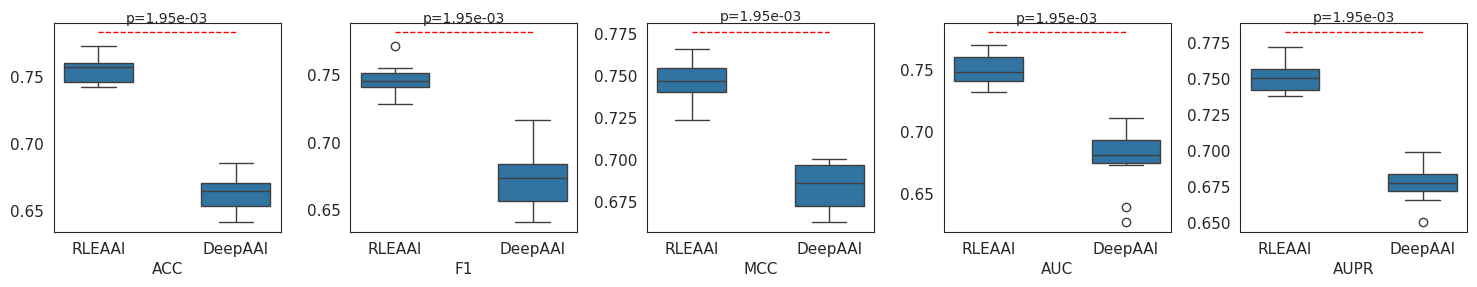

In [7]:
# ===============================
# Imports
# ===============================
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

# ===============================
# Plot Style (Journal-ready)
# ===============================
sns.set_style("white")
plt.rcParams.update({
    "font.size": 11,
    "axes.titlesize": 12,
    "axes.labelsize": 11
})

# ===============================
# Example CV Results (Replace with your real data)
# Each metric has paired results (same folds)
# ===============================
np.random.seed(42)

metrics = ["ACC", "F1", "MCC", "AUC", "AUPR"]
data = []

for metric in metrics:
    rle = np.random.normal(loc=0.75, scale=0.015, size=10)
    deep = np.random.normal(loc=0.68, scale=0.02, size=10)

    for r, d in zip(rle, deep):
        data.append([metric, "RLEAAI", r])
        data.append([metric, "DeepAAI", d])

df = pd.DataFrame(data, columns=["Metric", "Model", "Score"])

# ===============================
# Plot Function
# ===============================
def plot_box_with_pvalue(ax, df, metric):
    subset = df[df["Metric"] == metric]

    sns.boxplot(
        data=subset,
        x="Model",
        y="Score",
        width=0.5,
        showfliers=True,
        ax=ax
    )

    # Paired statistical test
    rle = subset[subset["Model"] == "RLEAAI"]["Score"].values
    deep = subset[subset["Model"] == "DeepAAI"]["Score"].values
    stat, p = wilcoxon(rle, deep)

    # Annotation
    y_max = subset["Score"].max()
    ax.plot([0, 1], [y_max + 0.01, y_max + 0.01], "--", color="red", linewidth=1)
    ax.text(
        0.5,
        y_max + 0.015,
        f"p={p:.2e}",
        ha="center",
        va="bottom",
        fontsize=10
    )

    # ax.set_title(metric)
    ax.set_xlabel(metric)
    ax.set_ylabel("")

# ===============================
# Create Multi-panel Figure
# ===============================
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for ax, metric in zip(axes, metrics):
    plot_box_with_pvalue(ax, df, metric)

plt.tight_layout()
plt.savefig("boxplot_with_pvalues.pdf", dpi=300)
plt.show()
